In [25]:
%matplotlib inline
import numpy as np
import pylab
import pytry
import pandas
import seaborn
from nengo_bee import NengoBee

In [26]:
data = pytry.read('gather_gain_scheduled_12_14')

In [27]:
bee = NengoBee()

all_x = np.vstack([d['x'][:] for d in data])
all_x_body = bee.bee.world_state_to_body(all_x)
all_u = np.vstack([d['u'][:] for d in data])
all_y_star = np.vstack([d['y_star'][:] for d in data])

mean_x = np.mean(all_x, axis=0)
mean_x_body = np.mean(all_x_body, axis=0)
mean_u = np.mean(all_u, axis=0)
mean_y_star = np.mean(all_y_star, axis=0)

std_x = np.std(all_x, axis=0)
std_x_body = np.std(all_x_body, axis=0)
std_u = np.std(all_u, axis=0)
std_y_star = np.std(all_y_star, axis=0)

print(mean_x_body)
print(mean_u)
print(mean_y_star)

C:\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


[  4.94631583e-03  -2.53033057e-03   1.07023365e-01  -5.64486564e-01  -5.13470840e-03   2.56614885e-03  -1.06153422e-01   5.65884032e-01  -6.66323888e-02   1.19347835e-03  -1.49942562e-02   4.27923550e-02  -4.59845160e-03  -1.07268071e-02  -3.03888484e-02  -2.00674397e-02  -1.07037609e-01   4.79287399e-02  -9.25435438e-05  -2.05341601e-02]
[  1.32305896e+02  -3.26681094e+00  -6.00491159e-02  -7.91501789e-04]
[ 0.12058824  0.          7.94117647  0.        ]


In [28]:
x_names = [
    '$\phi_r$',
    '$\psi_r$',
    '$\dot{\phi}_r$',
    '$\dot{\psi}_r$',
    '$\phi_l$',
    '$\psi_l$',
    '$\dot{\phi}_l$',
    '$\dot{\psi}_l$',
    '$\phi$',
    '$\\theta$',
    '$\psi$',
    '$x$',
    '$y$',
    '$z$',
    '$\dot{\phi}$',
    '$\dot{\\theta}$',
    '$\dot{\psi}$',
    '$\dot{x}$',
    '$\dot{y}$',
    '$\dot{z}$',
]

u_names = [
    'stroke ampl.', 'pitch torque', 'yaw torque', 'roll'
]

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


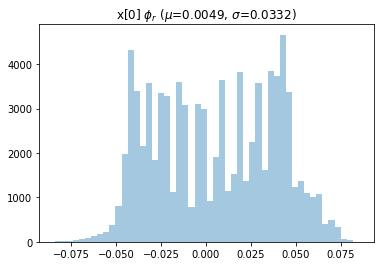

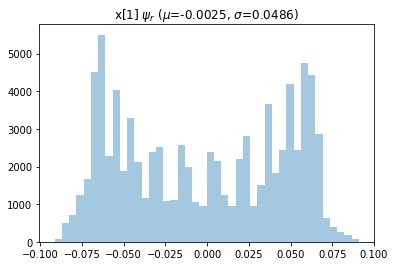

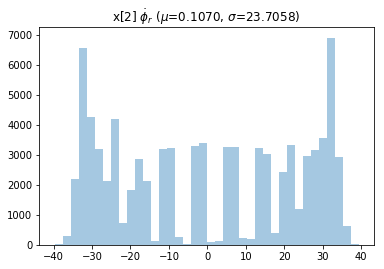

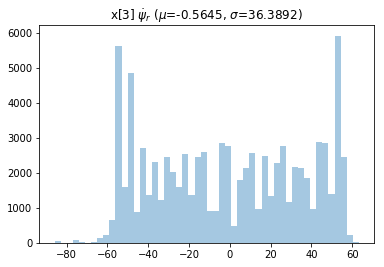

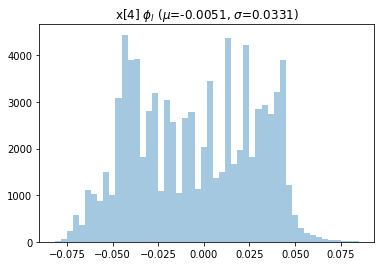

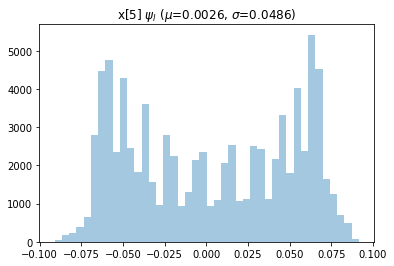

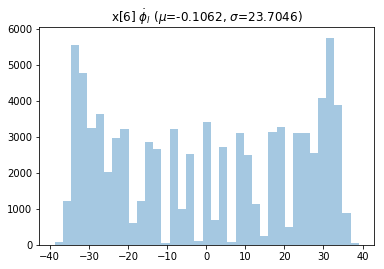

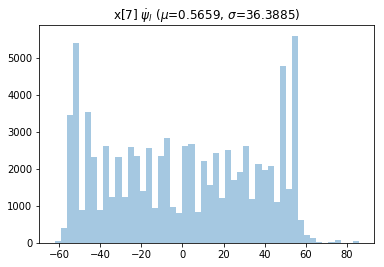

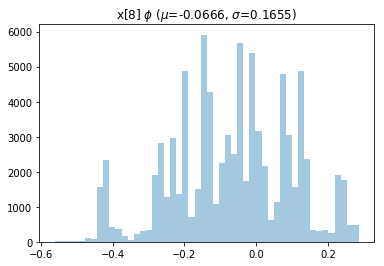

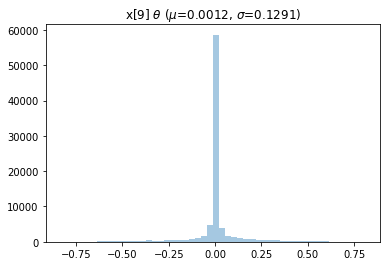

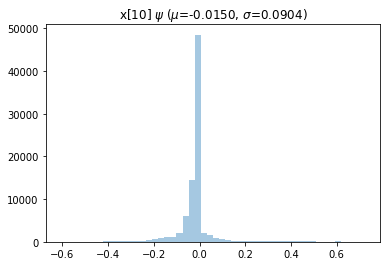

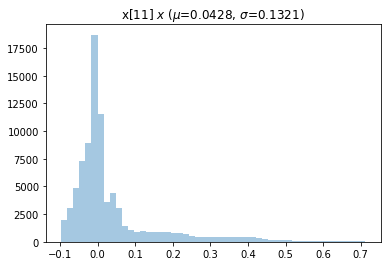

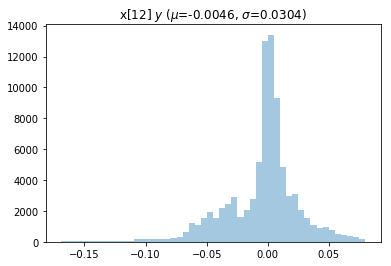

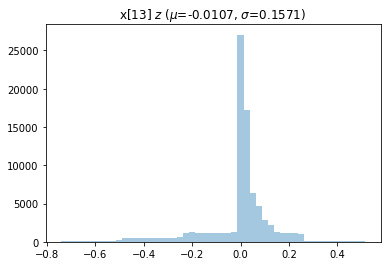

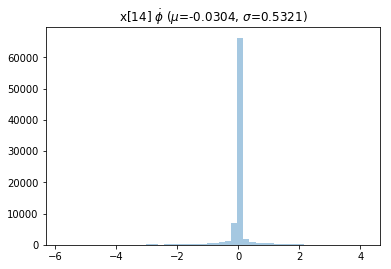

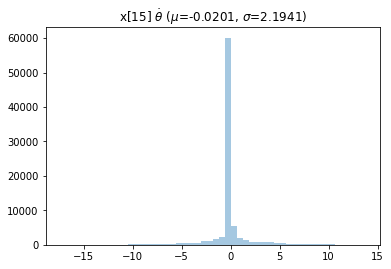

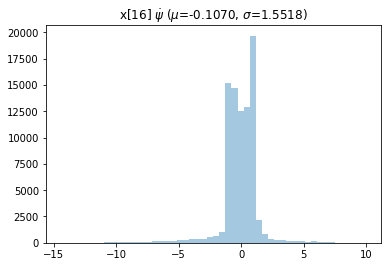

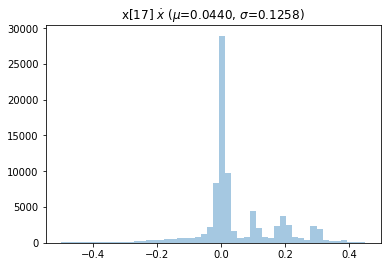

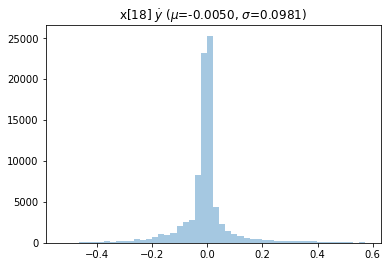

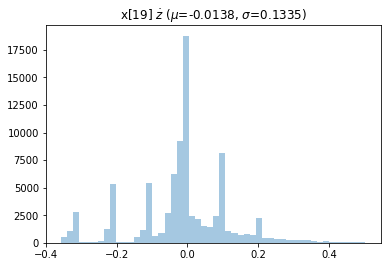

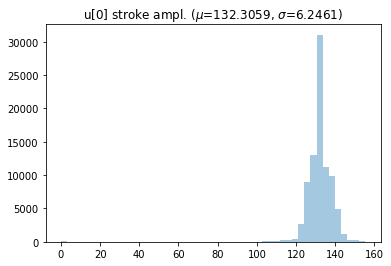

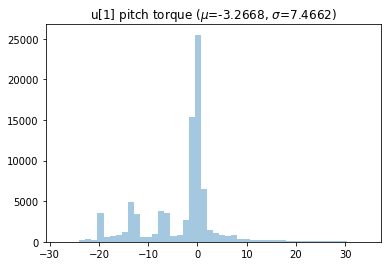

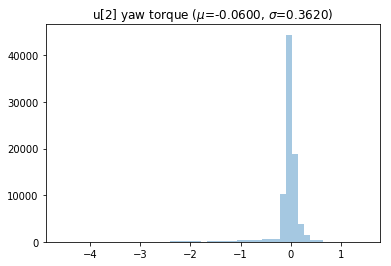

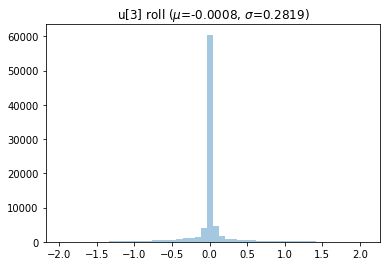

In [29]:
for i in range(20):
    pylab.figure()
    seaborn.distplot(all_x[:,i], kde=0)
    pylab.title('x[%d] %s ($\mu$=%1.4f, $\sigma$=%1.4f)' % (i, x_names[i], mean_x[i], std_x[i]))
    
for i in range(4):
    pylab.figure()
    if std_u[i] > 0:
        seaborn.distplot(all_u[:,i], kde=0)
    pylab.title('u[%d] %s ($\mu$=%1.4f, $\sigma$=%1.4f)' % (i, u_names[i], mean_u[i], std_u[i]))
    
# for i in range(4):
#     pylab.figure()
#     if std_u[i] > 0:
#         seaborn.distplot(all_du[:,i], kde=0)
#     pylab.title('$\dot{u}$[%d] %s rate ($\mu$=%1.4f, $\sigma$=%1.4f)' % (i, u_names[i], mean_du[i], std_du[i]))

In [30]:
norm_x = (all_x - mean_x) / std_x
norm_x_body = (all_x_body - mean_x_body) / std_x_body
norm_u = (all_u - mean_u) / std_u
norm_y_star = (all_y_star - mean_y_star) / std_y_star

print(std_x)
print(std_x_body)
print(std_u)
print(std_y_star)

[  3.31992738e-02   4.86102945e-02   2.37058337e+01   3.63892148e+01   3.31466020e-02   4.86045687e-02   2.37046241e+01   3.63884824e+01   1.65507035e-01   1.29137073e-01   9.04167181e-02   1.32147713e-01   3.04301679e-02   1.57056845e-01   5.32147682e-01   2.19405949e+00   1.55183658e+00   1.25845790e-01   9.80630279e-02   1.33534225e-01]
[  3.31992738e-02   4.86102945e-02   2.37058337e+01   3.63892148e+01   3.31466020e-02   4.86045687e-02   2.37046241e+01   3.63884824e+01   1.65507035e-01   1.29137073e-01   9.04167181e-02   1.32147713e-01   3.04301679e-02   1.57056845e-01   5.32147682e-01   2.19405949e+00   1.55183658e+00   1.23602825e-01   1.00481909e-01   1.31700546e-01]
[ 6.24613576  7.46619451  0.3620497   0.28192157]
[  0.09993943   0.          63.14220234   0.        ]


In [31]:
keep_x_names = ['theta_dot', 'psi_dot', 'v_x', 'v_y', 'v_z']
keep_x = [bee.bee.state_names.index(name) for name in keep_x_names]
keep_u = [1,3]

x_vals = norm_x[:,keep_x]
u_vals = norm_u[:,keep_u]

# du_vals = norm_du[:,[0,1,3]]
pts = np.hstack([x_vals, u_vals])

print(np.shape(pts))

(85000, 7)


In [32]:
# import nengo
# model = nengo.Network()
# with model:
#     D = pts.shape[1]
#     ens = nengo.Ensemble(n_neurons=500, dimensions=D, neuron_type=nengo.LIFRate(), radius=np.sqrt(D))
#     u_node = nengo.Node(None, size_in=3)
#     
#     c = nengo.Connection(ens, u_node, eval_points=pts, scale_eval_points=False, function=u_vals)

In [33]:
# sim = nengo.Simulator(model)

In [34]:
# sim.data[c].solver_info

In [35]:
# pylab.plot(fn)

In [36]:
np.savez('gather-gain_scheduled_12_14', 
         mean_x=mean_x,
         mean_x_body=mean_x_body,
         mean_u=mean_u, 
         mean_y_star=mean_y_star,
         std_x=std_x,
         std_x_body=std_x_body,
         std_u=std_u,
         std_y_star=std_y_star,
         all_u=all_u,
         all_x=all_x,
         all_x_body=all_x_body,
         all_y_star=all_y_star,
         norm_x=norm_x,
         norm_x_body=norm_x_body,
         norm_u=norm_u,
         norm_y_star=norm_y_star)